### Logistic regression


We need a binary categorical result as a dependent variable, and either:  
    a categorical or continous variable as an independent variable.

In this example, we use the Iris data set again.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import load_iris

In [3]:
df = pd.read_csv("D:\DSB\Logistic Regression/Iris.csv")

The major issue is having three types of plants with two characteristics each.
The dataset overview (https://archive-beta.ics.uci.edu/dataset/53/iris) additionally states:
> "One class is linearly separable from the other 2; the latter are NOT linearly separable from each other"

From the previous videos, we know, that Iris **setosa** is easier to identify - small petal width and length but larger SepalWidth with a smaller SepalLength

<Axes: xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

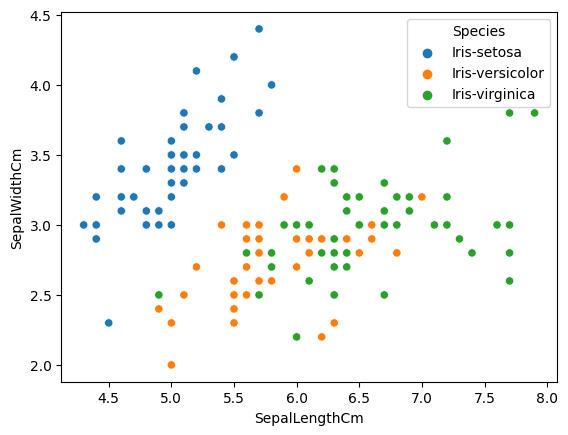

In [4]:
sns.scatterplot(data = df, x = "SepalLengthCm", y ="SepalWidthCm", hue="Species")

<Axes: xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

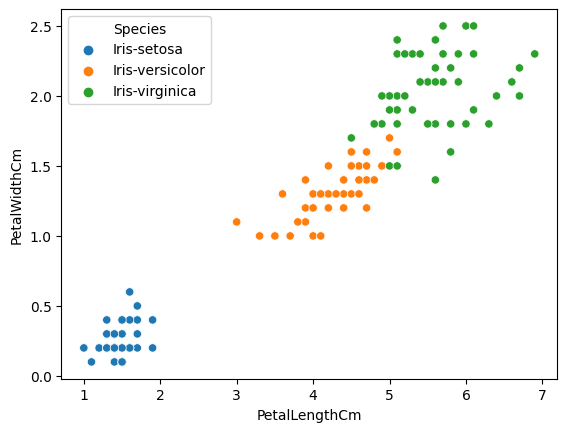

In [5]:
sns.scatterplot(data = df, x = "PetalLengthCm", y ="PetalWidthCm", hue="Species")

## Logistic Regression

First, we repurpose the label "Species" to the values 0, 1 and 2 instead of the factual names (setosa etc.). The relevant keyword here is _label encoding_.

In [6]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])
df['Species'].describe()


count    150.000000
mean       1.000000
std        0.819232
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        2.000000
Name: Species, dtype: float64

In [7]:
from sklearn.model_selection import train_test_split

# X has no species(= our input), while y is only the species (=the result)

X = df.drop(columns = ['Species'])
y = df['Species']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.25, random_state=20)

In [9]:
print (df.drop(columns = ['Species']))

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0      1            5.1           3.5            1.4           0.2
1      2            4.9           3.0            1.4           0.2
2      3            4.7           3.2            1.3           0.2
3      4            4.6           3.1            1.5           0.2
4      5            5.0           3.6            1.4           0.2
..   ...            ...           ...            ...           ...
145  146            6.7           3.0            5.2           2.3
146  147            6.3           2.5            5.0           1.9
147  148            6.5           3.0            5.2           2.0
148  149            6.2           3.4            5.4           2.3
149  150            5.9           3.0            5.1           1.8

[150 rows x 5 columns]


In [15]:
print (df['Species'])

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int32


In [22]:
from sklearn.linear_model import LogisticRegression

# Combining model creation and fitting (=train) - instead of another line: model.fit(X,Y)
model = LogisticRegression(solver='liblinear', random_state=20).fit(X_train, Y_train)

In [23]:
# How well did our model do in training?
accuracy_score = round(model.score(X_train, Y_train) * 100, 2)
print("Accuracy:", accuracy_score, "percent in TRAINING")

Accuracy: 91.96 percent in TRAINING


In [24]:
#How well does it in testing?
accuracy_score = round(model.score(X_test, Y_test) * 100, 2)
print("Accuracy:", accuracy_score, "percent")

Accuracy: 89.47 percent


In [28]:
from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix(Y_test, model.predict(X_test))

array([[12,  0,  0],
       [ 0, 10,  4],
       [ 0,  0, 12]], dtype=int64)